## Imports

In [1]:
import data

import numpy as np

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import utils

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

In [2]:
doodle_map, X, y = data.auto_load(size=500, categories=[
    'mushroom', 'table', 'knee', 'bench', 'boomerang', 'diving board', 'calendar', 'dog', 'onion', 'monkey', 'tooth', 'belt', 'garden', 'The Mona Lisa', 'van', 'giraffe', 'door', 'popsicle', 'bed', 'book', 'pants', 'tennis racquet', 'shovel', 'bracelet', 'waterslide', 'lighter', 'nail', 'police car', 'pear', 'peanut', 'potato', 'The Great Wall of China', 'stove', 'squiggle', 'lipstick', 'aircraft carrier', 'teddy-bear', 'calculator', 'hospital', 'moustache', 'computer', 'drill', 'house', 'apple', 'hamburger', 'purse', 'rabbit', 'speedboat', 'cow', 'crocodile'
])

In [3]:
doodle_map

['aircraft carrier',
 'apple',
 'bed',
 'belt',
 'bench',
 'book',
 'boomerang',
 'bracelet',
 'calculator',
 'calendar',
 'computer',
 'cow',
 'crocodile',
 'diving board',
 'dog',
 'door',
 'drill',
 'garden',
 'giraffe',
 'hamburger',
 'hospital',
 'house',
 'knee',
 'lighter',
 'lipstick',
 'monkey',
 'moustache',
 'mushroom',
 'nail',
 'onion',
 'pants',
 'peanut',
 'pear',
 'police car',
 'popsicle',
 'potato',
 'purse',
 'rabbit',
 'shovel',
 'speedboat',
 'squiggle',
 'stove',
 'table',
 'teddy-bear',
 'tennis racquet',
 'The Great Wall of China',
 'The Mona Lisa',
 'tooth',
 'van',
 'waterslide']

## Feature Scaling

In [4]:
scaler = StandardScaler()
#X = scaler.fit_transform(X)

## Unflatten Array (for convolutional neural network)

In [5]:
X = X.reshape(-1, 28, 28, 1)

## OneHotEncoding

In [6]:
y = utils.to_categorical(y, len(doodle_map))

## Train Test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)

### Create Neural Network

In [8]:
# Create a sequential model
model = models.Sequential()

# Add Input Layer
model.add(layers.Conv2D(32, kernel_size=5, activation="relu", input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D(pool_size=2, strides=2))

# Add Hidden Layers
model.add(layers.Conv2D(64, kernel_size=5, activation="relu"))
model.add(layers.MaxPooling2D(pool_size=2, strides=2))

model.add(layers.Flatten())
model.add(layers.Dense(1000, activation="relu"))
model.add(layers.Dense(1000, activation="relu"))

# Add Output Layer
model.add(layers.Dense(len(doodle_map), activation="softmax"))

# Compile
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=2500)

Train on 20000 samples, validate on 5000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/5
20000/20000 [==============================] - 9s 444us/sample - loss: 3.5611 - acc: 0.1292 - val_loss: 3.0421 - val_acc: 0.2252
Epoch 2/5
20000/20000 [==============================] - 3s 134us/sample - loss: 2.8643 - acc: 0.2587 - val_loss: 2.6223 - val_acc: 0.3272
Epoch 3/5
20000/20000 [==============================] - 3s 135us/sample - loss: 2.4261 - acc: 0.3603 - val_loss: 2.2415 - val_acc: 0.4180
Epoch 4/5
20000/20000 [==============================] - 3s 134us/sample - loss: 2.1318 - acc: 0.4349 - val_loss: 2.0653 - val_acc: 0.4550
Epoch 5/5
20000/20000 [==============================] - 3s 133us/sample - loss: 1.9252 - acc: 0.4877 - val_loss: 1.9147 - val_acc: 0.4904


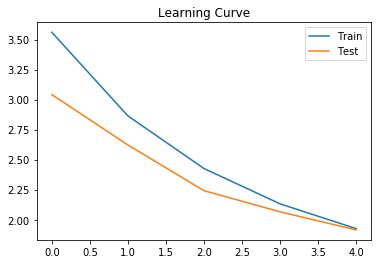

In [10]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.title('Learning Curve')
plt.legend()
plt.show()

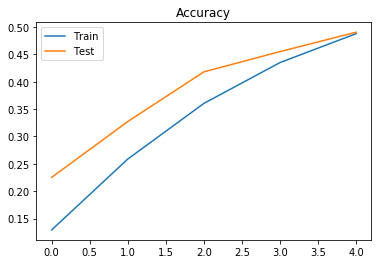

In [11]:
plt.plot(history.history['acc'], label='Train')
plt.plot(history.history['val_acc'], label='Test')
plt.title('Accuracy')
plt.legend()
plt.show()

32 conv 64 conv 1000 dense 0.7785

64 conv 32 conv 1000 dense 0.7748

64 conv 32 conv 500 dense 0.7632

32 conv 64 conv 1000 dense 1000 dense 0.7900

32 conv 64 conv 2000 dense 0.7867

32 conv 64 conv 1000 dense 500 dense 250 dense 0.7786

32 conv 64 conv 750 dense 750 dense 0.7870

In [12]:
model.save('my_model.h5')